# 05 - The Unreasonable Effectiveness of Linear Regression


## All You Need is Regression

인과추론을 다루면서 `potential outcome`을 살펴보았습니다. $Y_0$는 `treatment`가 없을 때, $Y_1$는 `treatment`가 있을 때 `outcome`입니다. `treatment` $T$를 `0`이나 `1`로 지정하면 `potential outcome` 중 하나를 구체화하며 나머지 하나를 아는 것이 불가능해집니다. 이는 `individual treatment effect`(개별 처치 효과)인 $\tau_i = Y_{1i} - Y_{0i}$를 알수 없다는 의미입니다.

$
Y_i = Y_{0i} + T_i(Y_{1i} - Y_{0i}) = Y_{0i}(1-T_i) + T_i Y_{1i}
$

`average causal effect`(평균 인과 효과)를 추정하는 더 간단한 작업에 초점을 맞추겠습니다. 어떤 사람들은 `treatment`에 더 잘 반응하지만, 누구인지는 알 수 없습니다. 따라서 **평균적인** `treatment effect`를 확인해 보겠습니다.

$
ATE = E[Y_1 - Y_0]
$

상수 `treatment effect`를 가진 단순한 모델($Y_{1i} = Y_{0i} + \kappa$)이 있습니다. $\kappa$가 양수면 `treatment`는 평균적으로 긍정적인 효과를 나타냅니다. 일부 사람들에게 부정적인 반응을 보일지라도 평균적으로는 긍정적입니다.

편향으로 인해 $E[Y|T=1] - E[Y|T=0]$로 $E[Y_1 - Y_0]$를 알 수 없다는 사실을 기억해 봅시다. 편향은 종종 `treatment` 외 다른 이유로 발생합니다. 편향을 확인하는 한 가지 방법은 `potential outcome` $Y_0$와 얼마나 다른지 계산하는 것 입니다.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0]\}}_{BIAS}
$

2장에서 무작위 실험이나 **Randomised Controlled Trial**(RCT)로 편향을 제거하는 방법을 알아보았습니다. RCT는 `treatment`에 무관하게 개별 `unit`이 같도록 강제하여 편향을 없애줍니다. 또한, `treatment effect`에 대한 불확실성 수준을 아는 방법도 배웠습니다. 온라인 강좌 예시에서 $T=0$은 대면 강의, $T=1$은 온라인 강의를 의미했습니다. 학생들을 그 두 가지 유형의 강의 중 하나에 무작위로 배정된 후 성적을 평가했습니다. A/B 테스트 함수를 구현하여 두 그룹을 비교하고 `average treatment effect`와 신뢰 구간을 계산할 수 있었습니다.

이제 인과 추론을 해결하는 방법을 살펴볼 때입니다. **선형 회귀**! `treatment`와 `untreatment`를 비교하는 것이 단순한 디저트였다면 선형 회귀는 고급 티라미수입니다. 전자가 집에서 구운 삼겹살이라면, 후자는 고든 램지가 직접 구운 스테이크입니다.

![img](./data/img/linear-regression/you_vs.png)

선형회귀가 어떻게 아름답게 적용되는지 봅시다. 아래 코드에서 온라인 수업과 대면 수업을 비교하는 분석을 합니다. 신뢰 구간을 계산하는 대신 회귀 분석을 수행합니다. 다음 모델을 추정합니다.

$
exam_i = \beta_0 + \kappa \ Online_i + u_i
$

온라인 수업인 경우 `baseline` $\beta_0$ + $\kappa$에 추가 항을 더하여 모델링합니다. 물론 시험 결과는 추가 변수(예: 시험 당일 학생의 기분, 공부 시간 등)에 의해 결정됩니다. 하지만 그 관계를 기술하지는 않습니다. 대신에 $u_i$ 항으로 나머지 모든 것을 표현합니다. 이를 오차항이라 부릅니다.

$Online$은 `treatment` 지표로 `dummy variable`입니다. 대면 수업일 때 0이고, 온라인 수업일 때 1입니다. 선형 회귀는 $E[Y|T=0] = \beta_0$과 $E[Y|T=1] = \beta_0 + \kappa$를 복원할 수 있으며, $\kappa$는 `ATE`와 같습니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import graphviz as gr
%matplotlib inline

In [2]:
data = pd.read_csv("data/online_classroom.csv").query("format_blended==0")

result = smf.ols('falsexam ~ format_ol', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,78.5475,1.113,70.563,0.000,76.353,80.742
format_ol,-4.9122,1.680,-2.925,0.004,-8.223,-1.601


놀랍네요! `ATE`를 추정할 수 있을 뿐만 아니라, 신뢰구간과 `p-value`를 얻을 수 있습니다! 또한, $E[Y|T=0]$와 $E[Y|T=1]$를 비교하여 회귀 분석 인과 추론에 적합하다는 것을 알 수 있습니다. `intercept`(절편)은 $T=0$일 때 샘플의 평균 $E[Y|T=0]$이며, 온라인 수업의 계수는 평균적인 샘플 간 차이 $E[Y|T=1] - E[Y|T=0]$ 입니다. 못 믿겠나요? 괜찮습니다. 직접 확인할 수 있습니다.

In [3]:
(data
 .groupby("format_ol")
 ["falsexam"]
 .mean())

format_ol
0    78.547485
1    73.635263
Name: falsexam, dtype: float64

역시나 절편인 온라인 수업 추정치를 더하면 `treatment`가 적용된 샘플의 평균값인 $78.5475 + (-4.9122) = 73.635263$을 얻을 수 있습니다.

## Regression Theory

선형 회귀가 어떻게 구성되고 추정되는지에 대해 너무 깊이 파고들 생각은 없습니다. 하지만 약간의 이론은 인과 추론의 장점을 설명하는 데 큰 도움이 될 것입니다. 우선 회귀 분석은 이론적으로 최상의 선형 예측 문제를 해결합니다. $\beta^*$는 매개 변수 벡터라 합니다.

$
\beta^* =\underset{\beta}{argmin} \ E[(Y_i - X_i'\beta)^2]
$

선형 회귀는 평균 제곱 오차(MSE)를 최소화하는 모수를 찾습니다. 만약 MSE를 미분하고 0으로 설정한다면 해답은 다음과 같이 주어집니다.

$
\beta^* = E[X_i'X_i]^{-1}E[X_i' Y_i]
$

샘플 데이터로 $\beta^*$를 추정할 수 있습니다.

$
\hat{\beta} = (X'X)^{-1}X' Y
$

코드를 잘 이해하는 사람이라면 직접 시도해 보는 것이 좋습니다.

In [4]:
X = data[["format_ol"]].assign(intercep=1)
y = data["falsexam"]

def regress(y, X): 
    return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

beta = regress(y, X)
beta

array([-4.9122215 , 78.54748458])

선형회귀 공식들은 꽤 일반적입니다. 하지만 주로 하나의 `regressor`를 다루곤 합니다. 인과추론에서는 종종 결과 $y$에 대한 변수 $T$의 인과적 영향을 추정하고자 합니다. `T` 효과를 추정하기 위해 단일 변수를 회귀 분석에 사용합니다. 다른 변수는 보조적으로 사용할 뿐입니다. 다른 변수를 추가하면 인과효과를 추정하는 데 도움이 되지만, 추가 변수들의 매개 변수를 추정하는 것에는 별로 관심이 없습니다.

단일 회귀 변수 $T$의 경우 매개 변수는 다음과 같습니다.

$
\beta_1 = \dfrac{Cov(Y_i, T_i)}{Var(T_i)} 
$

$T$가 임의로 할당된 경우 $\beta_1$이 `ATE`입니다.

In [5]:
kapa = data["falsexam"].cov(data["format_ol"]) / data["format_ol"].var()
kapa

-4.912221498226949

`regressor`가 두 개 이상이라면 공식을 확장하여 사용할 수 있습니다. 다른 변수들은 보조적이며, $T$의 매개 변수 $\kappa$를 추정하는 데만 관심이 있다고 해보겠습니다.

$
y_i = \beta_0 + \kappa T_i + \beta_1 X_{1i} + ... +\beta_k X_{ki} + u_i
$

$\kappa$는 다음 공식으로 얻을 수 있습니다.

$
\kappa = \dfrac{Cov(Y_i, \tilde{T_i})}{Var(\tilde{T_i})} 
$

$\tilde{T_i}$는 $T_i$에 대한 다른 모든 공변량 $X_{1i} + ... + X_{ki}$의 회귀 잔차 입니다. 얼마나 멋진가요! 다변량 회귀 분석 계수는 **모델 내 다른 변수의 효과를 고려한** 동일한 회귀 모델의 이변량 계수임을 의미합니다. 인과추론에서 $\kappa$는 다른 모든 변수를 사용하여 예측한 $T$의 이변량 계수입니다.

다른 변수로 $T$를 예측할 수 있다면 $T$가 무작위가 아니라는 것을 의미합니다. 그러나 다른 변수를 제어하면 $T$가 무작위만큼 좋게 만들 수 있습니다. 이를 위해 선형 회귀로 다른 변수에서 $T$를 예측한 후, 잔차 $\tilde{T}$를 구합니다. 정의에 따르면 이미 $T$를 $X$로 예측했기 때문에 $\tilde{T}$는 다른 변수 $X$로 예측 할 수 없습니다. 따라서 $\tilde{T}$는 $X$ 내 다른 변수와 관련 없는 버전입니다.

잔차 $\tilde{T}$는 항상 $X$직교하며 잔차를 생성한 모델의 변수와는 상관관계가 없습니다. 이러한 성질은 선형회귀의 특징입니다.

In [6]:
e = y - X.dot(beta)
print("Orthogonality imply that the dot product is zero:", np.dot(e, X))
X[["format_ol"]].assign(e=e).corr()

Orthogonality imply that the dot product is zero: [-5.11590770e-13  3.34665629e-12]


,format_ol,e
format_ol,1.000000e+00,-1.545493e-15
e,-1.545493e-15,1.000000e+00


더 멋진 점은 이러한 특성이 어떤 것에도 의존하지 않는다는 것입니다! 데이터와 상관없이 수학적으로 참입니다.

## Regression For Non-Random Data

지금까지 무작위 실험 데이터를 사용했습니다. 하지만 무작위 데이터는 실제로 얻기 어렵습니다. 실험에 매우 비용이 많이 들 수 있으며 단순히 실험할 수 없기도 합니다. 예를 들어 맥킨지가 서비스를 무작위로 무료로 제공하도록 설득하는 것은 매우 어렵습니다. 따라서 맥킨지의 컨설팅 서비스에 지불할 여유가 있는 회사는 이미 매우 부유하다는 사실을 알고 있습니다.

지금부터 비무작위 혹은 관측 데이터를 살펴보겠습니다. 우리는 교육을 받은 기간이 시간당 임금에 미치는 영향을 추정하려 합니다. 짐작하셨겠지만 교육을 주제로 실험하는 것은 매우 어렵습니다. 단순히 4년, 8년, 12년의 교육을 받은 사람들을 무작위 추출할 수는 없습니다. 관측 데이터가 전부입니다.

매우 간단한 모델을 사용해보겠습니다. 우리는 교육기간에 대해 시간당 임금의 `log`값을 추정할 것입니다. 로그를 사용하여 매개 변수 추정치는 백분율로 해석됩니다. (로그의 놀라운 속성을 알고 싶다면 [LINK](https://stats.stackexchange.com/questions/244199/why-is-it-that-natural-log-changes-are-percentage-changes-what-is-about-logs-th)를 참고하세요.) 따라서 1년의 추가 교육이 x%의 임금 인상을 낳는다고 말할 수 있습니다.

$
log(hwage)_i = \beta_0 + \beta_1 educ_i + u_i
$

In [7]:
wage = pd.read_csv("./data/wage.csv").dropna()
model_1 = smf.ols('np.log(hwage) ~ educ', data=wage.assign(hwage=wage["wage"]/wage["hours"])).fit()
model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3071,0.104,22.089,0.000,2.102,2.512
educ,0.0536,0.008,7.114,0.000,0.039,0.068


$\beta_1$의 추정치는 0.0536이며 95% 신뢰 구간은 (0.039, 0.068)입니다. 추가 교육을 받을 때마다 임금이 약 5.3% 증가할 것으로 예측함을 의미합니다. 이 결과는 교육이 기하급수적으로 임금에 영향을 미친다는 상식과 일치합니다. 우리는 11년에서 12년의 교육을 받는 것보다 14년에서 16년의 교육을 받는 것이 효과 있을 것으로 예상합니다.

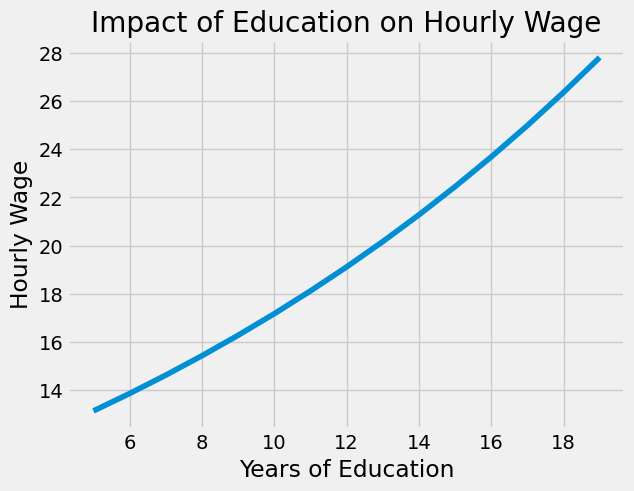

In [8]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

x = np.array(range(5, 20))
plt.plot(x, np.exp(model_1.params["Intercept"] + model_1.params["educ"] * x))
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage")
plt.title("Impact of Education on Hourly Wage")
plt.show()

물론 단순한 모델을 사용했기에 정확한 결과는 아닙니다. 제가 교육 기간으로 임금을 **예측한다**는 말을 조심스럽게 한 것에 주목하세요. 인과관계가 있다고 말한 적은 없습니다. 여러분은 모델이 편향되어 있다고 생각할 수 있습니다. 사용한 데이터가 무작위 실험에서 나온 것이 아니므로 교육 기간이 다른 사람들을 비교할 수 없습니다. 상식적으로 교육 기간이 다른 사람을 바로 비교할 수 없음을 알고 있습니다. 교육을 더 많이 받은 사람들은 집안이 더 부유할 것이며, 교육 기간에 따라 임금이 올라가는 결과는 집안의 부와 교육 기간이 연관되어 있기 때문이라고 주장할 수 있습니다. 수학적으로 말하자면 $E[Y_0|T=0] < E[Y_0|T=1]$이며, 교육 기간이 긴 사람은 교육을 받지 않았더라도 어쨌든 더 높은 임금을 받을 것이라 할 수 있습니다. 만약 당신이 교육에 대해 비관적인 사람이라면 사람들을 일자리에서 멀어지게 함으로써 임금을 *줄일 수 있다고* 주장할 수 있습니다.

다행히도 다른 많은 변수에 접근할 수 있습니다. 부모의 교육 수준인 `meduc`, `feduc`, 그 사람의 `IQ` 점수, 경력 연수 `exper`, 현직 회사의 재직 기간 `tenure` 등을 알 수 있습니다. 우리는 심지어 결혼 `married`과 흑인 여부 `black`에 대한 `dummy variable`을 알고 있습니다.

In [9]:
wage.head()

,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
0,769,40,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0
2,825,40,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0
3,650,40,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0
4,562,40,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0
6,600,40,2.708050,91,10,13,0,30,0,0,0,1,1,2.0,8.0,8.0


모든 추가 변수를 모델에 포함할 수 있습니다.

$
log(hwage)_i = \beta_0 + \kappa \ educ_i + \pmb{\beta}X_i + u_i
$

추가 변수가 편향 문제에 어떻게 도움이 되는지 이해하기 위해 다변량 선형 회귀 분석의 이변량 분석을 요약해 보겠습니다.

$
\kappa = \dfrac{Cov(Y_i, \tilde{T_i})}{Var(\tilde{T_i})} 
$

공식은 부모의 교육, IQ, 경험 등에서 `educ`를 예측할 수 있음을 의미합니다. 또한, 추가 변수와 상관 없는 버전인 $\tilde{educ}$를 얻습니다. $\tilde{educ}$는 "교육을 더 오래 받은 사람들은 더 높은 IQ를 가지고 있다. 따라서 교육이 임금 인상으로 이어지는 것은 아니다. 임금은 IQ와 관련 있을 뿐이다." 와 같은 주장을 무너뜨립니다. 모델에 `IQ`를 포함하면 $\kappa$는 고정된 `IQ`에서 교육 시간에 대한 해를 `return`합니다. 무엇을 의미하는지 이해하기 전에 잠시 쉬어갑시다. 무작위로 `treated`와 `untreated` 데이터를 통제하거나 데이터가 무작위가 아니더라도 선형회귀는 작업을 잘할 수 있습니다.

In [10]:
controls = ['IQ', 'exper', 'tenure', 'age', 'married', 'black',
            'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']

X = wage[controls].assign(intercep=1)
t = wage["educ"]
y = wage["lhwage"]

beta_aux = regress(t, X)
t_tilde = t - X.dot(beta_aux)

kappa = t_tilde.cov(y) / t_tilde.var()
kappa

0.041147191010058204

`kappa`는 같은 IQ, 경험, 종신 재직권, 나이 등을 가진 사람들은 교육 기간에 따라 시간당 임금이 4.11% 상승할 것임을 알려줍니다. 4.11%는 앞의 5.3%보다 작으므로 `educ`만 고려한 단순한 모델이 편향되어 있음을 알 수 있습니다. 또한, 편향은 교육의 영향을 과대평가하고 있었습니다. 다른 추가 변수를 통제하고 나면, `educ`의 영향력은 떨어집니다.

통계 라이브러리인 `statsmodels`를 사용한다면 추정치의 신뢰 구간을 계산할 수 있습니다.

In [11]:
model_2 = smf.ols('lhwage ~ educ +' + '+'.join(controls), data=wage).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1156,0.232,4.802,0.000,0.659,1.572
educ,0.0411,0.010,4.075,0.000,0.021,0.061
IQ,0.0038,0.001,2.794,0.005,0.001,0.006
exper,0.0153,0.005,3.032,0.003,0.005,0.025
tenure,0.0094,0.003,2.836,0.005,0.003,0.016
age,0.0086,0.006,1.364,0.173,-0.004,0.021
married,0.1795,0.053,3.415,0.001,0.076,0.283
black,-0.0801,0.063,-1.263,0.207,-0.205,0.044
south,-0.0397,0.035,-1.129,0.259,-0.109,0.029
urban,0.1926,0.036,5.418,0.000,0.123,0.262


## Omitted Variable or Confounding Bias

남은 문제는 `kappa`가 인과관계인가 하는 것입니다. 안타깝게도 확실히 말할 수 없습니다. 처음의 단순한 모델(교육 기간으로 임금을 추정)은 인과관계가 아닐 것입니다. 모델은 교육과 임금 모두와 상관관계가 있는 중요한 변수를 생략합니다. 중요 변수를 통제하지 않은 상태에서 교육으로 추정된 효과는 모델에 포함되지 않은 다른 변수들의 영향을 포함합니다.

편향이 어떻게 영향을 주는지 이해하기 위해 진정한 모델이 약간 아래와 같다고 가정해 보겠습니다.

$
Wage_i = \alpha + \kappa \ Educ_i + A_i'\beta + u_i
$

임금은 $\kappa$의 크기와 벡터 $A$로 표시되는 추가 능력 인자에 영향을 받습니다. 모델에서 능력을 제외하면 $\kappa$에 대한 추정치는 다음과 같습니다.

$
\dfrac{Cov(Wage_i, Educ_i)}{Var(Educ_i)} = \kappa + \beta'\delta_{Ability}
$

$\delta_{A}$는 $Educ$에 대한 $A$의 회귀 계수 벡터입니다.

핵심은 원하는 $\kappa$가 아니라는 것입니다. 대신 성가신 항인 $\beta'\delta_{A}$와 함께 옵니다. $\beta'\delta_{A}$는 $A$가 $Wage$에 미치는 영향으로, $Educ$에 대한 누락된 영향에 $\beta$를 곱한 것입니다. 이는 경제학자들에게 중요합니다. Joshua Angrist는 학생들이 명상 중에 암송할 수 있게 만트라로 만들었습니다.

```
"Short equals long 
plus the effect of omitted 
times the regression of omitted on included"
```

만트라에서 짧은 회귀 분석은 변수를 생략하는 회귀 분석이고 긴 회귀 분석은 변수를 포함하는 회귀 분석입니다. 공식과 만트라는 편향의 본질에 대한 통찰을 줍니다. 첫째, 생략된 변수가 종속 변수 $Y$에 영향을 미치지 않으면 편향은 0입니다. 임금과 무관한 것들은 통제할 필요가 없습니다. 둘째, 생략된 변수가 `treatment`에 영향을 주지 않으면 편향은 0입니다. 교육에 영향을 미치는 모든 변수가 모델에 포함되어 있다면, 임금과 관련있는 다른 변수와 섞을 방법은 없습니다.

![img](data/img/linear-regression/confused_cat.png)

간단히 **모델이 모든 교란 변수를 설명할 경우 OVB가 없다고 말합니다.** 인과 그래프를 활용해 봅시다. 교란 변수는 **처치와 결과를 모두 유발하는 변수**입니다. 임금 예시에서 IQ는 혼동자입니다. 높은 IQ를 가진 사람들은 교육 기간이 긴 경향이 있습니다. 공부가 쉽기 때문입니다. 따라서 높은 IQ가 교육을 유발한다고 말할 수 있습니다. 높은 IQ를 가진 사람들은 또한 선천적으로 더 생산적인 경향이 있고 결과적으로 더 높은 임금을 가지고 있기 때문에, IQ는 또한 임금을 유발합니다. 교란 요인은 처치와 결과 모두 영향을 미치는 변수이므로 `T`와 `Y`로 가는 화살표로 표시합니다. 그림에서는 $W$로 표시합니다. 긍정적인 인과관계를 빨간색, 부정적인 인과관계를 파란색으로 표시합니다.

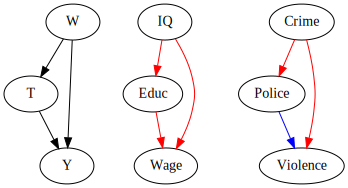

In [12]:
g = gr.Digraph()

g.edge("W", "T"), g.edge("W", "Y"), g.edge("T", "Y")

g.edge("IQ", "Educ", color="red"), g.edge("IQ", "Wage", color="red"), g.edge("Educ", "Wage", color="red")

g.edge("Crime", "Police", color="red"), g.edge("Crime", "Violence", color="red"), 
g.edge("Police", "Violence", color="blue")

g

인과 그래프는 생각을 정리하고 교란 편향이 어떤 영향을 주는지 보여줍니다. 두 번째 그림은 교육이 임금을 유발하는 그래프입니다. 더 많은 교육은 더 높은 임금으로 이어집니다. IQ는 임금과 교육을 유발합니다: 높은 IQ는 더 많은 교육과 임금을 유발합니다. 모델에서 IQ를 고려하지 않는다면, 임금에 미치는 영향 일부는 교육과의 상관관계를 통해 흐르게 됩니다. 따라서 교육의 영향을 실제보다 더 높게 평가합니다. 이는 `positive bias`(긍정적 편향)의 예입니다.

다른 예로 `negative bias`(부정적 편향)을 살펴봅시다. 세 번째 그림은 경찰(police)이 폭력(violence)에 미치는 영향에 대한 인과 그래프입니다. 상식적으로 경찰이 많은 도시는 더 많은 폭력이 발생합니다. 경찰이 폭력적이라는 것을 의미할까요? 그럴 수도 있지만, 토론 가치가 없다고 생각합니다. 폭력에 대한 경찰의 영향을 왜곡시키는 교란 변수가 있을 가능성도 있습니다. 경찰이 많아지면 폭력이 줄어들 수 있습니다. 세 번째 변수인 범죄(crime)는 더 많은 폭력과 더 많은 경찰을 유발합니다. 만약 범죄를 설명하지 않으면, 폭력에 대한 범죄의 영향은 경찰을 통해 흘러가며, 이는 폭력을 발생시키는 것처럼 보입니다.

인과 그래프는 회귀 및 무작위 실험이 교란 편향을 교정하는지 보여줍니다. RCT는 `treatment`에 대한 교란 변수의 연결을 끊습니다. 정의상 $T$를 임의로 만들면 어떠한 것도 원인이 되지 않습니다.

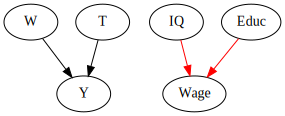

In [13]:
g = gr.Digraph()

g.edge("W", "Y"), g.edge("T", "Y")

g.edge("IQ", "Wage", color="red"), g.edge("Educ", "Wage", color="red")

g

반면 회귀 분석은 교란 변수 $W$를 고정하여 $T$의 효과를 비교합니다. 회귀 분석에서는 $W$는 고정되어 있어 $T$와 $Y$의 변화에 영향을 줄 수 없습니다.

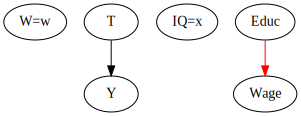

In [14]:
g = gr.Digraph()

g.node("W=w"), g.edge("T", "Y")
g.node("IQ=x"), g.edge("Educ", "Wage", color="red")

g

교육 예시로 돌아가서 `educ`이 임금 인과에 미치는 영향에 대해 추정한 매개변수는 무엇인가요? 모든 교란 요인이 모델에 포함되었다는 사실에 찬성하거나 반대하는 주장에 따라 다릅니다. 개인적으로는 모든 요인이 포함되지 않았다고 생각합니다. 예를 들어 가족의 재산을 포함하지 않았습니다. 가정교육 또한 부의 대신으로 볼 수밖에 없습니다. 또한, 개인적인 야망과 같은 요소들을 고려하지 않았습니다. 야망이 수년간의 교육과 더 높은 임금을 모두 유발하므로 `confounder`입니다. **비무작위 또는 관측 데이터를 사용한 인과 추론은 항상 소금 알갱이**로 취해야 합니다. 모든 교란 요인이 포함되었는지 결코 확신할 수 없습니다.

## Key Ideas

선형 회귀를 살펴보았습니다. 회귀 분석으로 A/B 검정을 수행하는 방법, 신뢰 구간을 편리하게 확인하는 방법을 공부했습니다. 회귀 분석이 예측 문제를 해결하는 방법과 조건부 기대 함수(CEF)에 대한 최상의 선형 근사치를 살펴봤습니다. 또한, 이변량의 경우, 회귀 처치 계수가 `treatment`와 `outcome`의 공분산을 `treatment`의 분산으로 나눈 것임을 확인했습니다. 다변량 사례로 확장하여 회귀 분석으로 처치 계수를 부분적으로 해석하는 방법을 알아냈습니다: 다른 모든 변수를 일정하게 유지하여 처치 결과를 해석합니다. 이는 경제학자들이 좋아하는 것으로 *ceteris paribus*라고 부릅니다.

마지막으로 편향을 살펴봤습니다. `Short equals long plus the effect of omitted times the regression of omitted on included`의 의미를 알아보았습니다. 이는 편향이 어떻게 생겨나는지 보여줍니다. 생략된 변수 편향의 원인은 `confounding`이며 `treatment`와 `outcome`에 모두 영향을 주는 변수입니다. 또한, 인과 그래프로 사용하여 RCT 및 회귀 분석이 어떻게 교란을 교정하는지 확인했습니다.

## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](./data/img/poetry.png)


## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. It uses only free software, based in Python. Its goal is to be accessible monetarily and intellectually.
If you found this book valuable and you want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits or giving feedback on passages you didn't understand. Just go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it useful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).